# Water Supply Inequalities in a Large Indian City
## Comparison of the City X’s IWS system with other systems


This code was used to compare supply for City X, Bengaluru, and Delhi. For City X, we used the summarized values of each supply pocket area from spatial analysis. For Bengaluru and Delhi, we use data for each supply pocket area from Meyer et al. (2023) study's data repository from a file named ‘WideCSV_BothCities.csv’.

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['figure.dpi'] = 600

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv files
data1 = pd.read_csv('WideCSV_BothCities.csv') #from Meyer et al. (2023) study's data repository from a file named ‘WideCSV_BothCities.csv’
data2 = pd.read_csv('avgpocket.csv',index_col=0) #file from spatial analysis

#modifying data1 column names and calculating SC, SD, SF
data1 = data1[['City', 'UniqueRowName', 'TotalHoursOfSupply','SupplyFrequency','ScheduleFrequency','NumberSupplyGaps','SupplyContinuity']]
data1 = data1[data1['SupplyContinuity'] != 1]
data1['SupplyContinuity'] = data1['SupplyContinuity']*24
data1['NumberSupplyGaps'] = data1['NumberSupplyGaps'].replace(0, 1)#replace supply gaps with 0 for a few rows of 0 to 1 because they are 24 hour intermittent supply 
data1['SupplyFrequencypermonth'] = data1['SupplyFrequency']*data1['NumberSupplyGaps']*30
data1['Avg.SupplyDur'] = data1['SupplyContinuity']/(data1['SupplyFrequency']*data1['NumberSupplyGaps'])
data1 = data1.rename(columns={'UniqueRowName': 'Pocket'})

#modifying data2 column names
data2 = data2[['Pocket','AvgCont', 'AvgDur','AvgFreq']]
data2 = data2.rename(columns={'AvgCont': 'SupplyContinuity'})
data2 = data2.rename(columns={'AvgDur': 'Avg.SupplyDur'})
data2 = data2.rename(columns={'AvgFreq': 'SupplyFrequencypermonth'})
data2['City'] = 'City X'

#Combining all the dataframes
list = [data1,data2]
data_combin = pd.concat(list)

In [3]:
#creating new dataframes grouped based on name of the City
filtered_df_cityx = data_combin[data_combin['City'] == 'City X']
filtered_df_bengaluru = data_combin[data_combin['City'] == 'Bengaluru']
filtered_df_delhi = data_combin[data_combin['City'] == 'Delhi']


In [4]:
#plot settings
rc = {'lines.linewidth': 4,
      'axes.labelsize': 18, 
      'axes.titlesize': 18}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2


<Figure size 3000x3000 with 0 Axes>

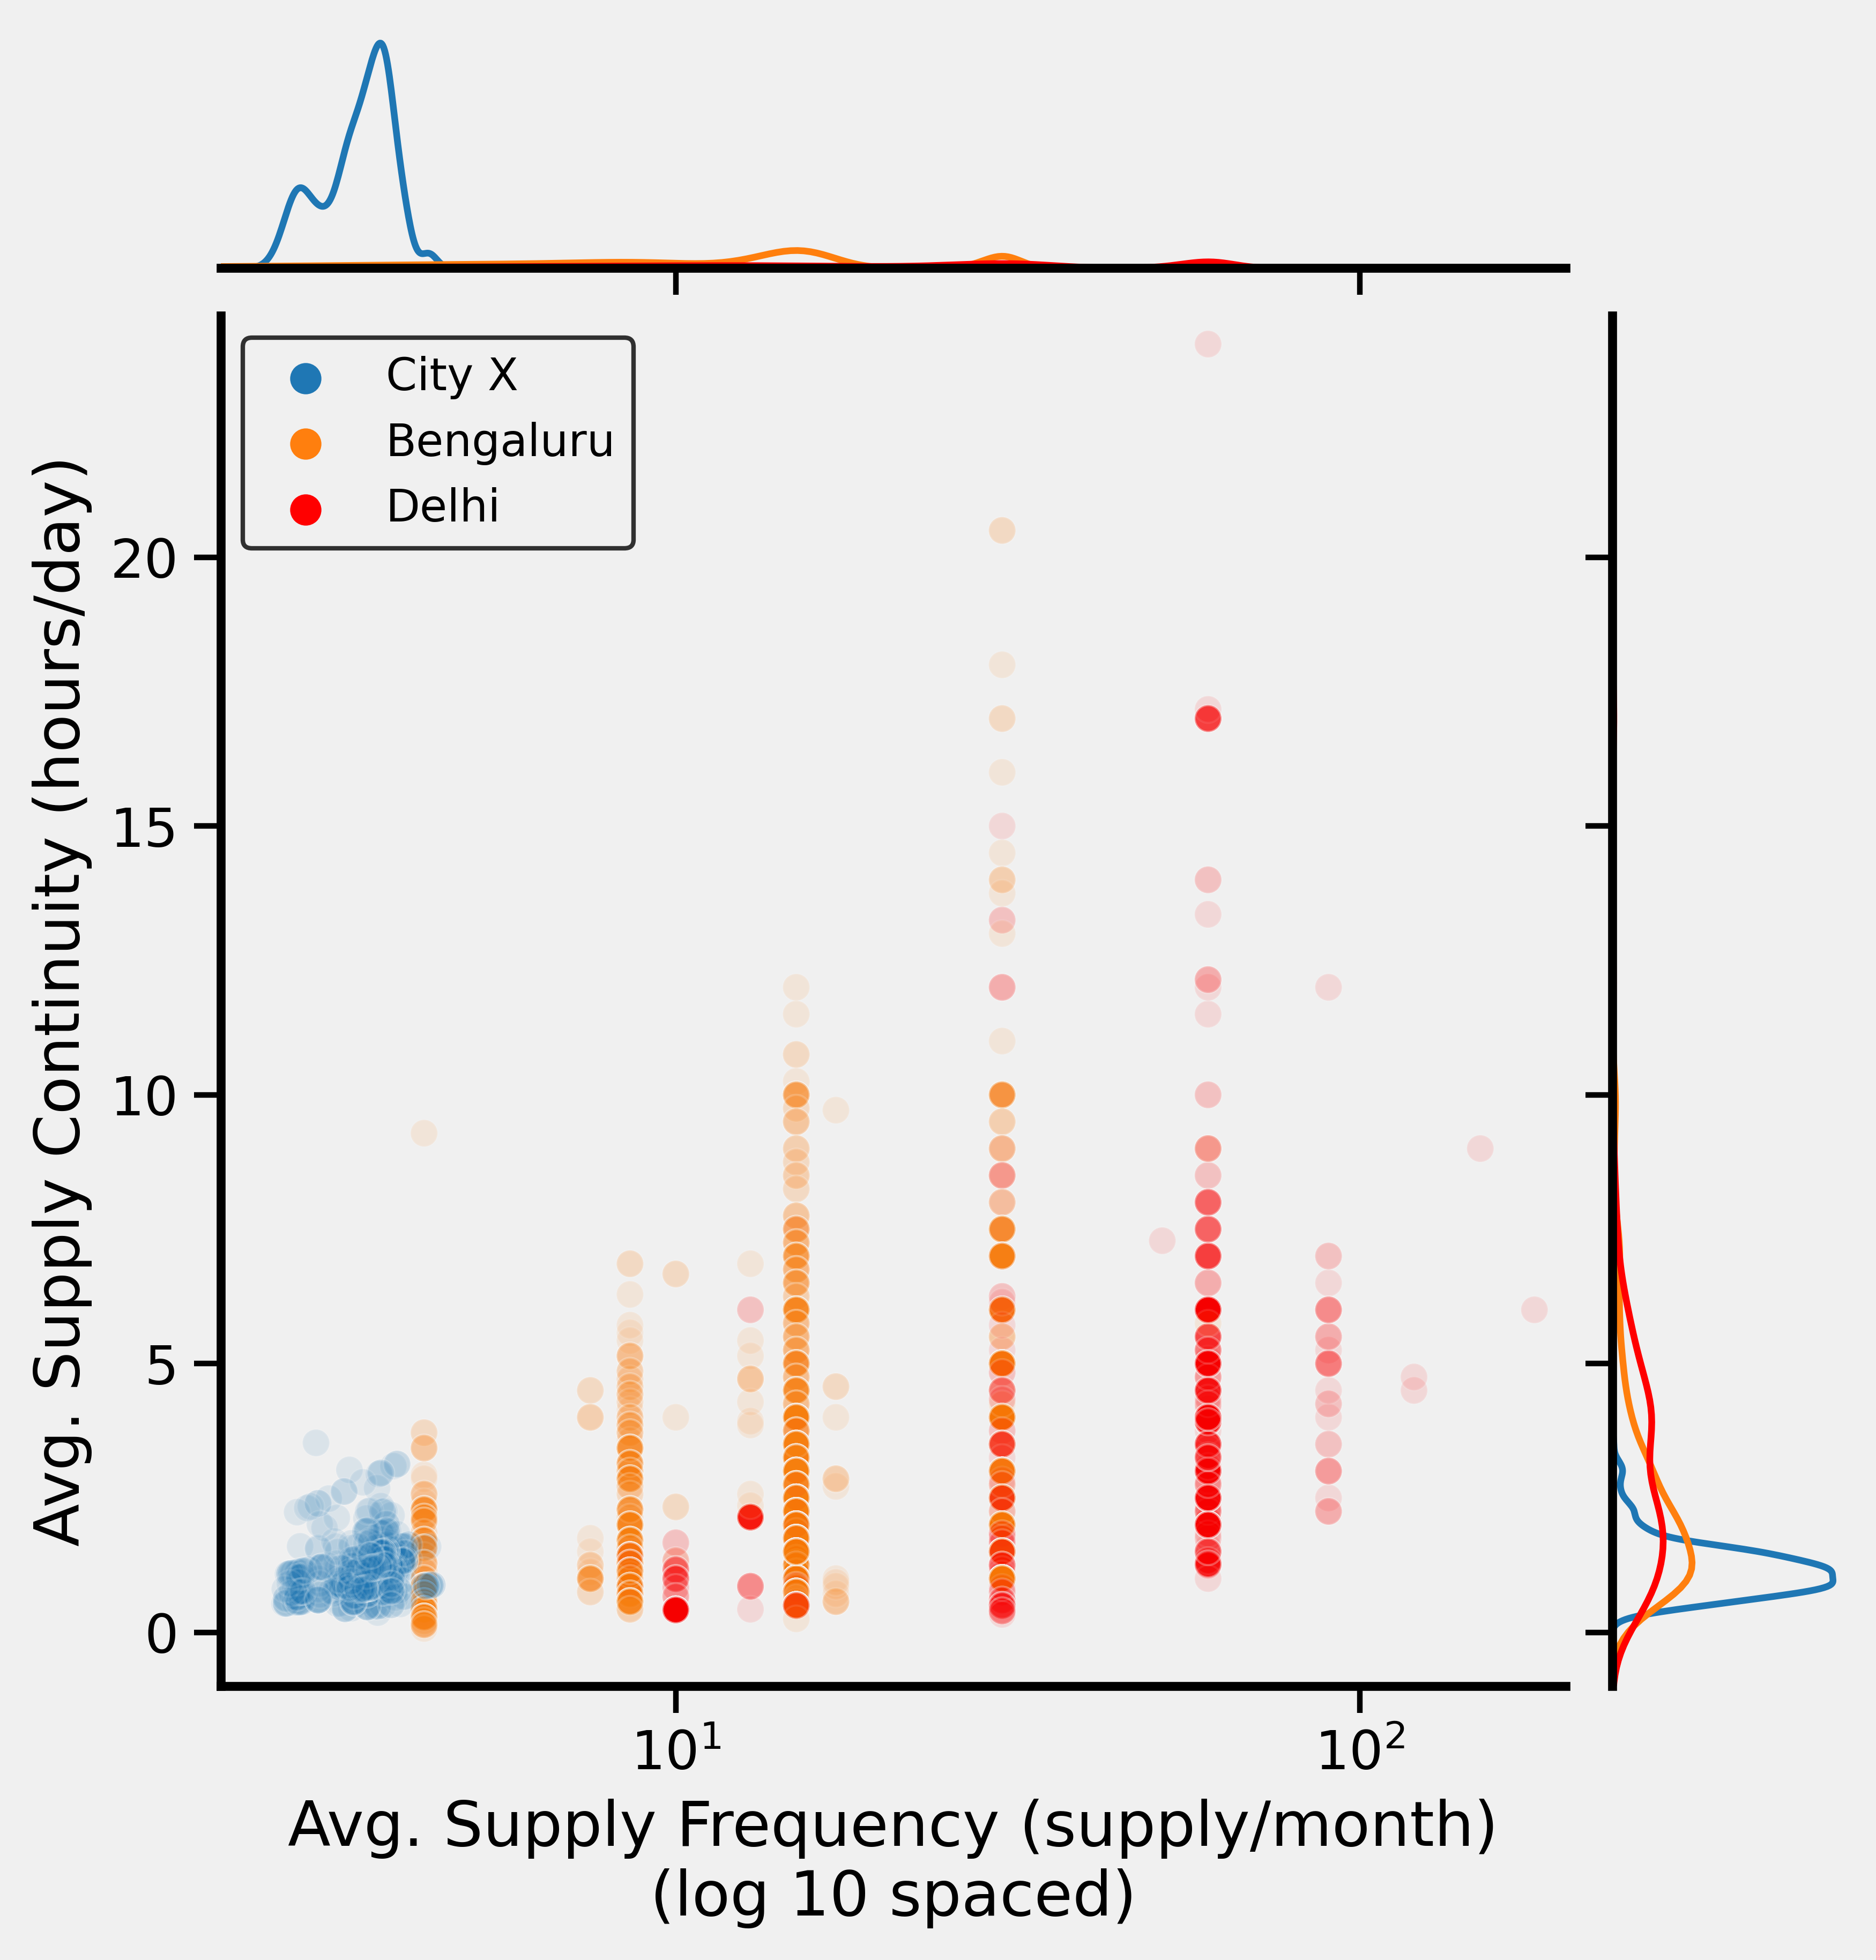

In [5]:
#Plotting scatterplot/JointGrid for all the three cities
fig = plt.figure(figsize=(5, 5)) 

desired_order = ['City X', 'Bengaluru', 'Delhi']
new_labels = ['City X', 'Bengaluru', 'Delhi']

custom_palette = {
    'City X': '#1f77b4',  # Blue
    'Bengaluru': '#ff7f0e',  # Orange
    'Delhi': 'red'           # Red
}

# Plotting Joint Grid
g = sns.JointGrid(data=data_combin, 
                  x="SupplyFrequencypermonth", 
                  y="SupplyContinuity", 
                  hue='City', 
                  hue_order=desired_order,
                  palette=custom_palette)

# Plot the scatter plot
g.plot_joint(sns.scatterplot)
g.ax_joint.collections[0].set_alpha(0.1)

#Plotting KDE
for group, color in custom_palette.items():
    subset = data_combin[data_combin['City'] == group]
    sns.kdeplot(subset['SupplyFrequencypermonth'], ax=g.ax_marg_x, color=color, label=group)
    sns.kdeplot(subset['SupplyContinuity'], ax=g.ax_marg_y, color=color, label=group, vertical=True)

g.set_axis_labels('Avg. Supply Frequency (supply/month)\n(log 10 spaced)', 'Avg. Supply Continuity (hours/day)', fontsize=14)
g.ax_joint.tick_params(axis='both', which='major', labelsize=12)
g.ax_joint.set_xscale('log', base=10)
g.ax_joint.minorticks_off()
g.ax_joint.set_xlim([0, 200])
g.ax_joint.set_ylim([-1, 24.5])
g.ax_joint.grid(False)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)

#Labelts
handles, labels = g.ax_joint.get_legend_handles_labels()
for i, label in enumerate(labels):
    if label in desired_order:
        labels[i] = new_labels[desired_order.index(label)]

#Plotting Legend
legend = g.ax_joint.legend(handles=handles, labels=labels, prop={'size': 10})
legend.get_frame().set_edgecolor('black') 

plt.savefig('city.png', dpi=300, bbox_inches='tight', transparent=True)

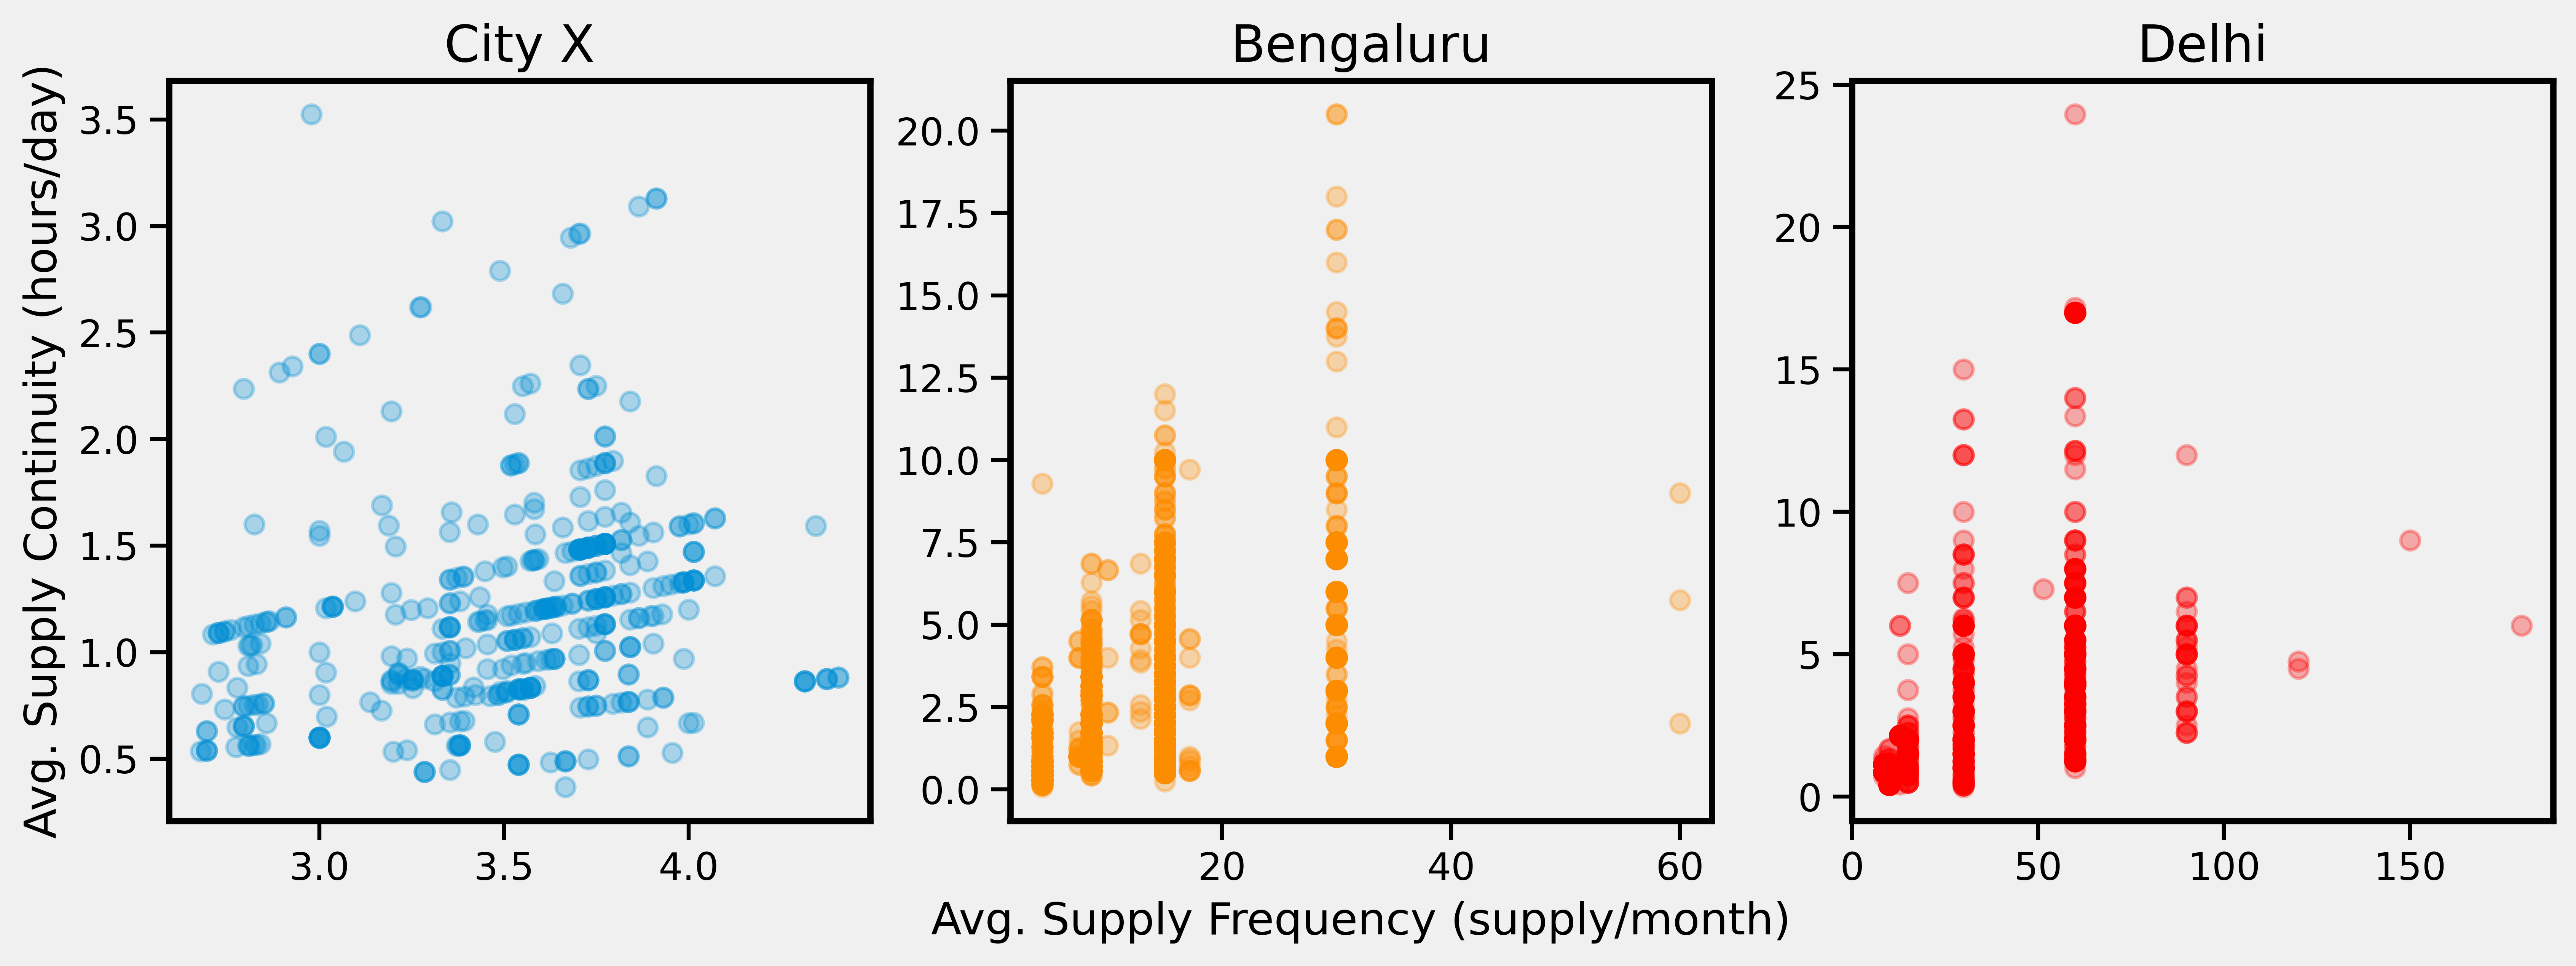

In [6]:
#Plotting for all the three cities
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

#Scatter Plot for City X
ax[0].scatter(x=filtered_df_cityx['SupplyFrequencypermonth'], y=filtered_df_cityx['SupplyContinuity'], zorder =2,alpha=0.3)
ax[0].set_title('City X', fontsize=16)
ax[0].set_ylabel('Avg. Supply Continuity (hours/day)', fontsize=14)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].grid(False)

#Scatter Plot for Bengaluru
ax[1].scatter(x=filtered_df_bengaluru['SupplyFrequencypermonth'], y=filtered_df_bengaluru['SupplyContinuity'], zorder=2,alpha=0.3, color ='darkorange')
ax[1].set_title('Bengaluru', fontsize=16)
ax[1].set_xlabel('Avg. Supply Frequency (supply/month)', fontsize=14)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].grid(False)

#Scatter Plot for Delhi
ax[2].scatter(x=filtered_df_delhi['SupplyFrequencypermonth'], y=filtered_df_delhi['SupplyContinuity'], zorder =2,alpha=0.3, color='red' )
ax[2].set_title('Delhi', fontsize=16)
ax[2].tick_params(axis='x', labelsize=12)
ax[2].tick_params(axis='y', labelsize=12)
ax[2].grid(False)

plt.savefig('city_3.png', dpi=300, bbox_inches='tight', transparent=True)

In [7]:
#updating plot settings
rc = {'lines.linewidth': 4,
      'axes.labelsize': 18, 
      'axes.titlesize': 18}
tick_size = 15

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 5
plt.rcParams.update({
    'lines.linewidth': 4,
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'xtick.major.size': tick_size,
    'xtick.minor.size': tick_size,
    'ytick.major.size': tick_size,
    'ytick.minor.size': tick_size,
    'ytick.major.width': 5,
    'ytick.minor.width': 5,
    'xtick.minor.width': 5,
    'xtick.major.width': 5
})

In [8]:
#violin plots to visualize the Supply Continuity spread 
plt.figure(figsize=(25, 15))

#plotting for all the three cities
sns.violinplot(data_combin, x="SupplyContinuity", y="City",cut=0,order=['City X','Bengaluru','Delhi'],palette=['#1f77b4','#ff7f0e','red'], width=0.9)

#plot settings
plt.xlabel('Supply Continuity(hours/day)',fontsize=45)
plt.ylabel('   ')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.xlim(0,24.5)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
plt.xticks([0, 4, 8, 12, 16,20, 24], ['0', '4', '8', '12', '16','20', '24'])
plt.grid(False)

plt.savefig('city_sc.png', dpi=300, bbox_inches='tight', transparent=True)